In [1]:
# Load packages and set the seaborn style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, preprocessing, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import os

In [2]:
# Load Hipparcos dataset
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""
df0 = pd.read_csv("hipparcos-voidmain.csv") 

# Take a subsample of the dataset with some features
df = df0[["Plx","Vmag","BTmag","VTmag","B-V","V-I","Hpmag","HvarType"]].copy()
# Remove rows with NaNs
df = df.dropna(axis=0)
df = df.head(5000)
df.head()

,Plx,Vmag,BTmag,VTmag,B-V,V-I,Hpmag,HvarType
1,21.90,9.27,10.519,9.378,0.999,1.04,9.4017,C
2,2.81,6.61,6.576,6.621,-0.019,0.00,6.6081,C
6,17.74,9.64,10.542,9.679,0.740,0.79,9.6795,C
7,5.17,9.05,10.433,9.151,1.102,3.92,8.5522,P
8,4.81,8.59,9.962,8.711,1.067,1.03,8.7534,C


In [3]:
df0.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [4]:
df0.shape

(118218, 78)

Read the data, plot the df and split the data.
Run this data in a classical machine learning and quantum machine learning

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical column
le = LabelEncoder()
df["HvarType"] = le.fit_transform(df["HvarType"])

# Standardize the dataset
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display processed dataset
print(df_scaled.head())

        Plx      Vmag     BTmag     VTmag       B-V       V-I     Hpmag  \
0  1.488359  0.730542  0.904654  0.754398  0.587662  0.446436  0.743450   
1 -0.452838 -1.426498 -2.003075 -1.489598 -1.662552 -1.473227 -1.507865   
2  1.065343  1.030582  0.921616  0.999390  0.015161 -0.015021  0.967324   
3 -0.212858  0.552141  0.841234  0.569637  0.815336  5.762428  0.058852   
4 -0.249465  0.179119  0.493900  0.211509  0.737971  0.427978  0.220996   

   HvarType  
0 -0.534560  
1 -0.534560  
2 -0.534560  
3  1.362389  
4 -0.534560  


🔹 Explained Variance Ratio: [5.66951765e-01 2.83096211e-01 1.38949333e-01 1.01018508e-02
 6.20062803e-04 1.79618102e-04 1.01159239e-04]
🔹 Cumulative Explained Variance: [0.56695176 0.85004798 0.98899731 0.99909916 0.99971922 0.99989884
 1.        ]


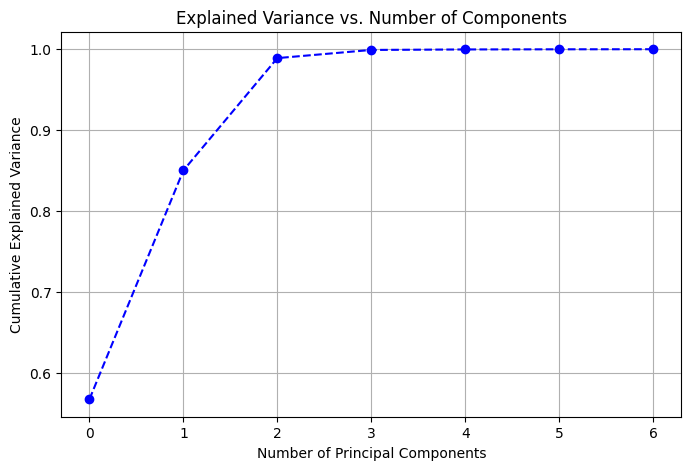


🔹 PCA Transformed Data (First 5 Rows):
        PC1       PC2       PC3
0  1.017045 -0.864191 -0.241038
1  1.683489  0.521910  1.871905
2 -3.380702 -1.363431 -0.713319
3 -0.750538 -0.779218  0.075512
4  0.678139  0.366822 -0.408191


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Load the dataset with error handling
try:
    df = pd.read_csv("hipparcos-voidmain.csv")  # Ensure file exists
except FileNotFoundError:
    print(" Error: The file 'hipparcos-voidmain.csv' was not found. Please check the file path.")
    exit()

# Step 2: Select numerical features for PCA (excluding categorical 'HvarType')
features = ["Plx", "Vmag", "BTmag", "VTmag", "B-V", "V-I", "Hpmag"]

# Check if features exist in dataset
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Error: Missing columns in dataset: {missing_features}")
    exit()

df_selected = df[features].dropna()  # Remove rows with missing values

# Step 3: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Step 4: Apply PCA
num_features = X_scaled.shape[1]
pca = PCA(n_components=num_features)  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Step 5: Check Explained Variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance of each component
print(" Explained Variance Ratio:", explained_variance)
print(" Cumulative Explained Variance:", np.cumsum(explained_variance))

# Step 6: Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Step 7: Reduce to optimal number of components (keeping ~95% variance)
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
pca_reduced = PCA(n_components=optimal_components)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

# Step 8: Convert to DataFrame
df_pca = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(optimal_components)])

#  Fix: Replace ace_tools with a standard Pandas display
print("\n PCA Transformed Data (First 5 Rows):")
print(df_pca.head())  # Show first few rows of PCA-transformed data

In [7]:
# Define new column names
new_column_names = {
    "Plx": "Parallax ",
    "Vmag": "Visual Magnitude",
    "BTmag": "Blue Tycho Magnitude",
    "VTmag": "Visual Tycho Magnitude",
    "B-V": "Color Index",
    "V-I": "Color Index",
    "Hpmag": "Hipparcos Magnitude",
    "HvarType": "Variability Type"
}

# Rename columns in the DataFrame
df_scaled = df_scaled.rename(columns=new_column_names)

# Print updated column names
print("Updated Column Names:", df_scaled.columns)

Updated Column Names: Index(['Parallax ', 'Visual Magnitude', 'Blue Tycho Magnitude',
       'Visual Tycho Magnitude', 'Color Index', 'Color Index',
       'Hipparcos Magnitude', 'Variability Type'],
      dtype='object')


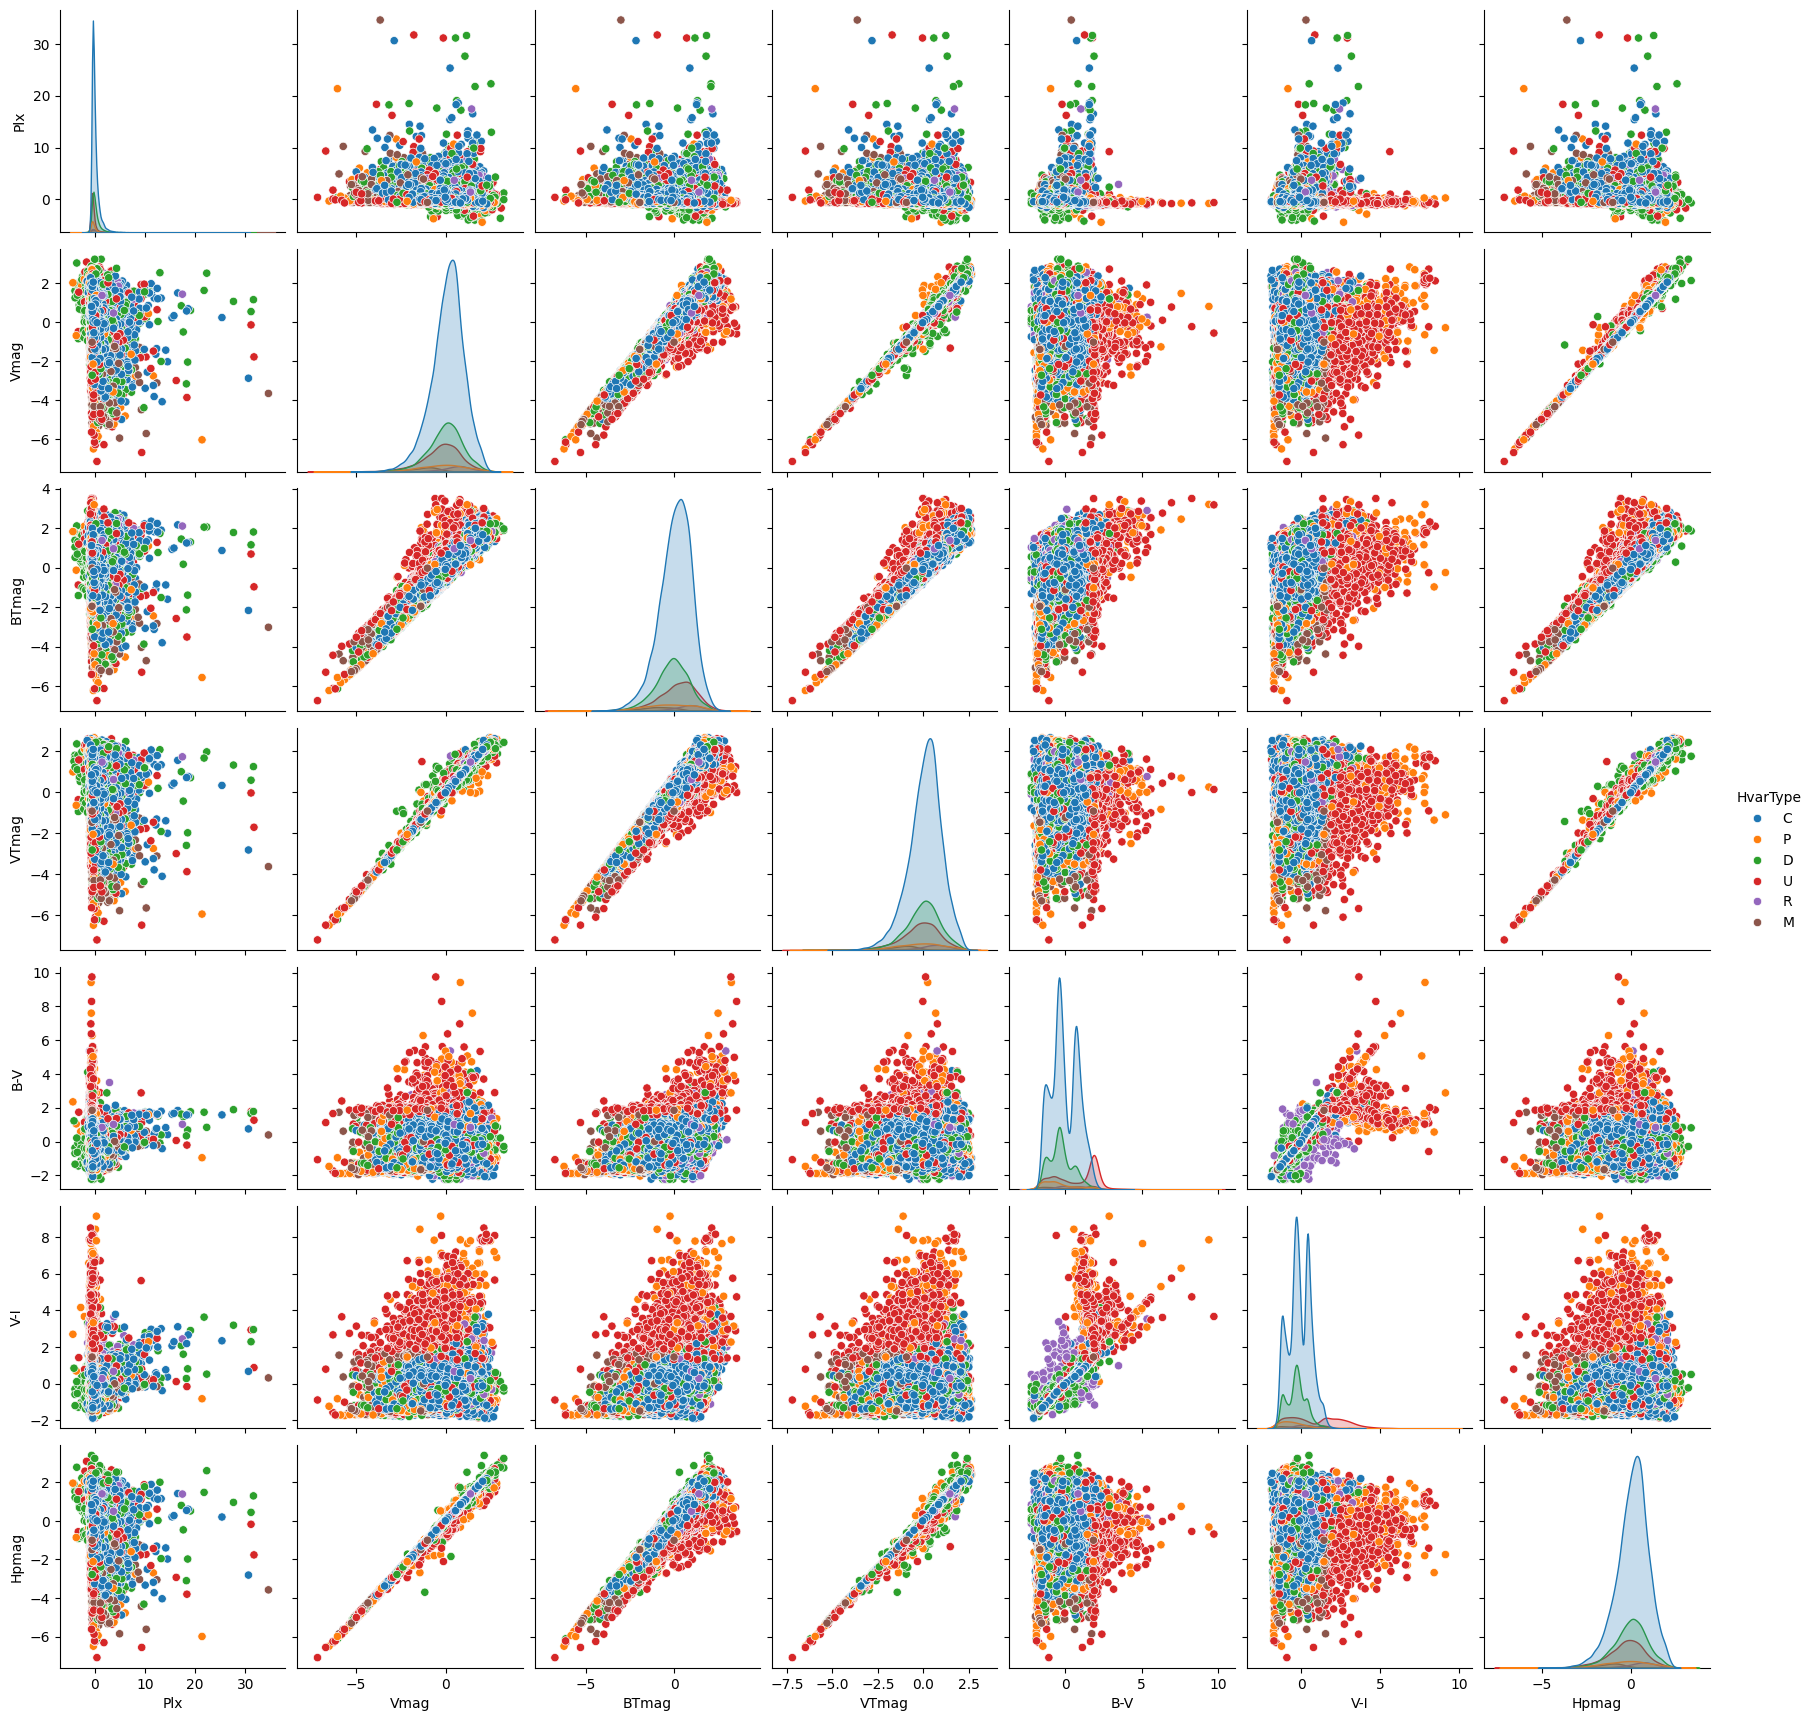

Feature Matrix Shape: (69490, 8)


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset with error handling
try:
    df = pd.read_csv("hipparcos-voidmain.csv")  # Ensure file exists
except FileNotFoundError:
    print("❌ Error: The file 'hipparcos-voidmain.csv' was not found. Please check the file path.")
    exit()

# Step 2: Select numerical features (excluding categorical 'HvarType')
features = ["Plx", "Vmag", "BTmag", "VTmag", "B-V", "V-I", "Hpmag"]

# Check if features exist in dataset
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"❌ Error: Missing columns in dataset: {missing_features}")
    exit()

# Step 3: Remove rows with NaNs (for consistent indexing)
df_selected = df[features + ["HvarType"]].dropna().reset_index(drop=True)  

# Step 4: Standardize the dataset
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected[features]), columns=features)

# Step 5: Add categorical column 'HvarType' for visualization
df_scaled["HvarType"] = df_selected["HvarType"].values  # Ensures matching row count

# Step 6: Pairplot visualization
sns.pairplot(df_scaled, hue="HvarType", palette="tab10")  # Color by 'HvarType'
plt.show()

# Step 7: Print feature matrix shape
print("Feature Matrix Shape:", df_scaled.shape)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
try:
    df = pd.read_csv("hipparcos-voidmain.csv")  
except FileNotFoundError:
    print("❌ Error: The file 'hipparcos-voidmain.csv' was not found. Please check the file path.")
    exit()

# Step 2: Select numerical features and target variable
features = ["Plx", "Vmag", "BTmag", "VTmag", "B-V", "V-I", "Hpmag", "HvarType"]

# Check for missing features
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"❌ Error: Missing columns in dataset: {missing_features}")
    exit()

# Step 3: Remove NaNs and reset index
df_selected = df[features].dropna().reset_index(drop=True)  

# Step 4: Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_selected.iloc[:, :-1]), columns=features[:-1])

# Step 5: Encode the categorical target variable ('HvarType')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_selected["HvarType"])

X_cut = X.head(500)
y_cut = y[:500]

# Step 6: Split into training and testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_cut, y_cut, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = clf.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

✅ Model Accuracy: 0.69

🔹 Classification Report:
              precision    recall  f1-score   support

           C       0.72      0.93      0.81        68
           D       0.00      0.00      0.00        13
           M       0.00      0.00      0.00         0
           P       0.00      0.00      0.00         7
           R       0.00      0.00      0.00         2
           U       0.75      0.60      0.67        10

    accuracy                           0.69       100
   macro avg       0.25      0.25      0.25       100
weighted avg       0.57      0.69      0.62       100



C:\Users\Gaige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gaige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gaige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

In [12]:
print(X_train.shape[1])
print(X_test.shape[1])

print(y_train.shape)
print(y_test.shape)

num_features = X_train.shape[1]

7
7
(400,)
(100,)


# Quantum Machine Learning

In [ ]:
#!pip install pylatexenc

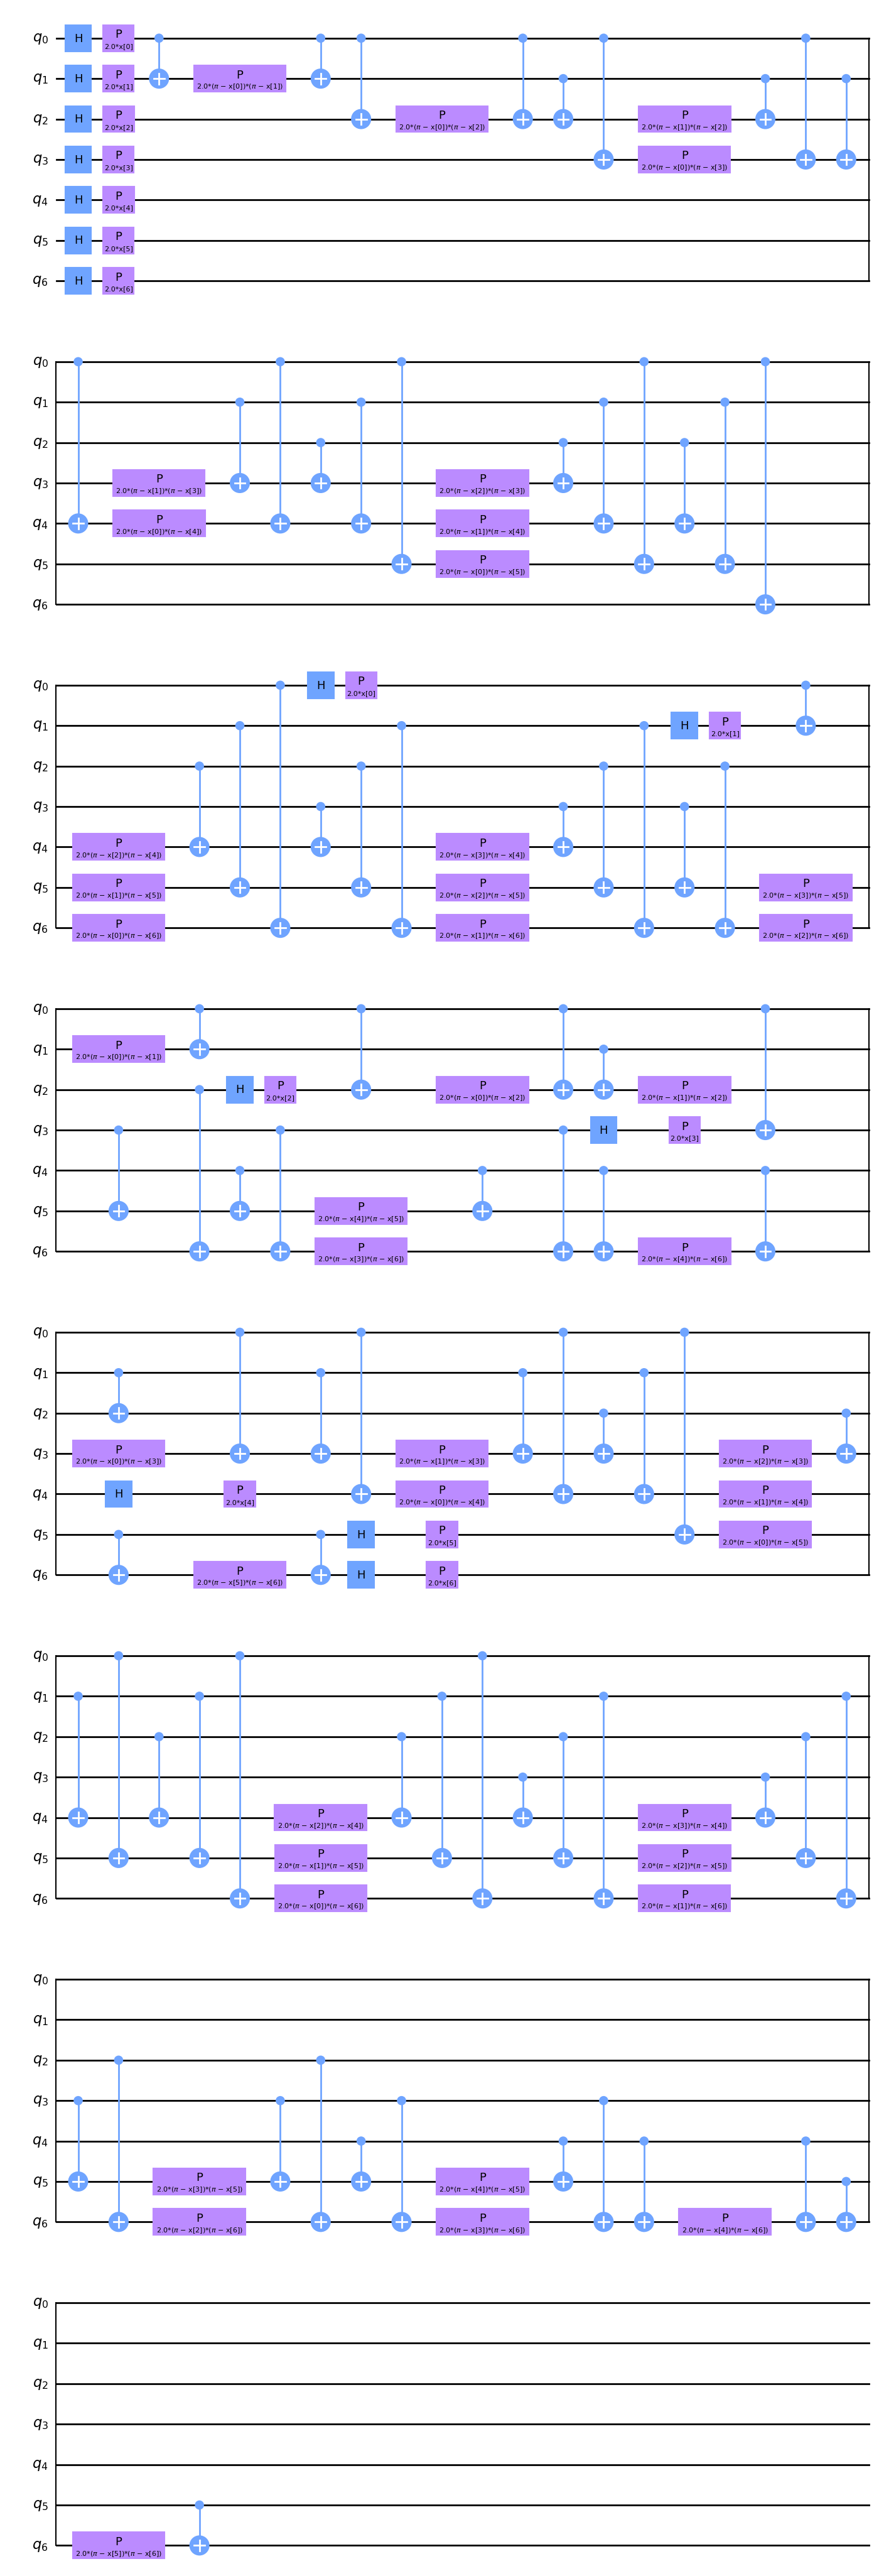

In [13]:
from qiskit.circuit.library import ZZFeatureMap
import pylatexenc

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

In [ ]:
# feature map, ansats, optimazor, vqc



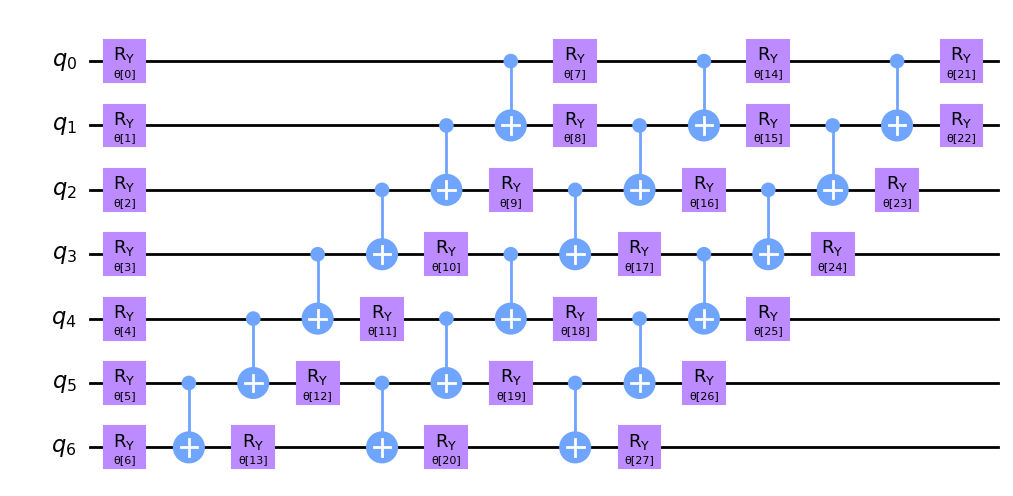

In [14]:
from qiskit.circuit.library import RealAmplitudes
num_features= 7 #changed to 4 to avoid PCA code
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [15]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=10)

In [16]:
from qiskit.primitives import Sampler

sampler = Sampler()

C:\Users\Gaige\AppData\Local\Temp\ipykernel_32744\2087805081.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [17]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
!pip install qiskit qiskit-machine-learning


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Gaige\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Gaige\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


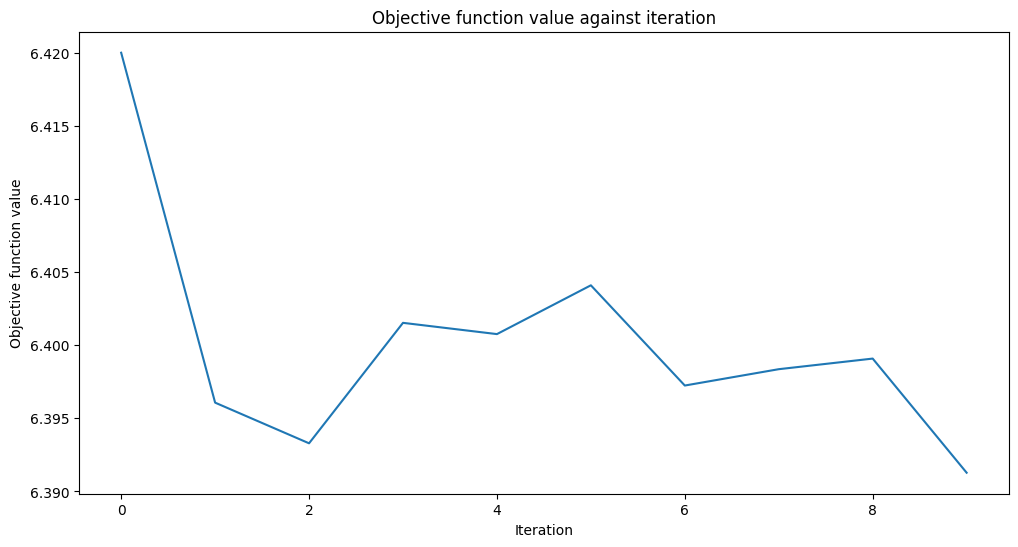

Training time: 49 seconds


In [18]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [19]:
train_score_q4 = vqc.score(X_train, y_train)
test_score_q4 = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.44
Quantum VQC on the test dataset:     0.42


* Do the same model but with EfficientSU feature map. Compare the scores.
* Do the optimizer L_BFGS
- zz + COBOLA
- zz + L_GFGS
- eff + COBOLA
- eff + L_BFGS

In [ ]:
#!pip install qiskit-Aer


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.circuit.library import TwoLayerQNN
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn

# Step 1: Load and Preprocess the Dataset
try:
    df = pd.read_csv("hipparcos-voidmain.csv")
except FileNotFoundError:
    print("❌ Error: The file 'hipparcos-voidmain.csv' was not found. Please check the file path.")
    df = None

if df is not None:
    features = ["Plx", "Vmag", "BTmag", "VTmag", "B-V", "V-I", "Hpmag", "HvarType"]

    # Check for missing features
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        print(f"❌ Error: Missing columns in dataset: {missing_features}")
    else:
        # Remove NaNs and reset index
        df_selected = df[features].dropna().reset_index(drop=True)

        # Standardize numerical features
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(df_selected.iloc[:, :-1]), columns=features[:-1])

        # Encode target variable ('HvarType')
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df_selected["HvarType"])

        # Reduce to binary classification for quantum model (since QML works best with 2 classes)
        y_binary = np.where(y == 0, 0, 1)  # Convert to binary labels

        # Split into training/testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

        # Step 2: Define the Quantum Feature Map
        num_features = X_train.shape[1]  # Feature dimension
        feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)

        # Step 3: Define the Variational Quantum Circuit
        qnn = TwoLayerQNN(num_qubits=num_features, feature_map=feature_map)

        # Step 4: Convert to Torch Model for Training
        qnn_model = TorchConnector(qnn)
        optimizer = optim.Adam(qnn_model.parameters(), lr=0.01)
        loss_func = nn.CrossEntropyLoss()

        # Convert Data to Torch Tensors
        X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_torch = torch.tensor(y_train, dtype=torch.long)
        X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
        y_test_torch = torch.tensor(y_test, dtype=torch.long)

        # Train the Quantum Neural Network
        epochs = 10
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = qnn_model(X_train_torch)
            loss = loss_func(output, y_train_torch)
            loss.backward()
            optimizer.step()
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

        # Step 5: Evaluate Model on Test Data
        with torch.no_grad():
            y_pred_qnn = qnn_model(X_test_torch)
            accuracy = (y_pred_qnn.argmax(dim=1) == y_test_torch).float().mean()
        
        print(f"Quantum Model Accuracy: {accuracy:.2f}")

ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\Gaige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\__init__.py)